In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train=np.load("./drive/My Drive/audio_train.npy")
test=np.load("./drive/My Drive/audio_test.npy")

In [4]:
train_labels=pd.read_csv("./drive/My Drive/labels_train.csv")
sample_submission=pd.read_csv("./drive/My Drive/sample_submission.csv")

In [5]:
train_labels

,id,label
0,0,5
1,1,1
2,2,1
3,3,0
4,4,9
...,...,...
937,937,9
938,938,1
939,939,1
940,940,5


In [6]:
label = list(train_labels['label'])

y_train = np.empty([len(train),1])
for i in range(len(label)):
  y_train[i] = label[i]
y_train = np.array(y_train, dtype='uint8')

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)

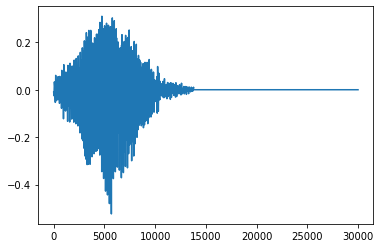

In [7]:
plt.plot(train[2])

In [ ]:
print(train_labels.label.unique())

[5 1 0 9 4 6 7 3 8]


In [ ]:
print(sample_submission.label.unique())

[ 1  6  3  7  4  8  9  5  2  0 10]


In [ ]:
print(np.shape(test)[1])

30000


In [8]:
verbose, epochs, batch_size = 0, 10, 32

In [9]:
n_timesteps, n_features, n_outputs = train.shape[0], train.shape[1], train_labels.shape[0]

In [10]:
n_timesteps

942

In [11]:
train.shape[0],train.shape[1]

(942, 30000)

In [12]:
train1=np.reshape(train,(train.shape[0],500,60))
train1.shape

(942, 500, 60)

In [13]:
test1=np.reshape(test,(test.shape[0],500,60))
test1.shape

(558, 500, 60)

In [14]:
train_labels.shape

(942, 2)

In [15]:
train.shape[1]

30000

In [16]:
model = models.Sequential()
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(500,60)))
model.add(layers.Conv1D(filters=64, kernel_size=3, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.MaxPooling1D(pool_size=15))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))



In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 498, 64)           11584     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 496, 64)           12352     
_________________________________________________________________
dropout (Dropout)            (None, 496, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 33, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2112)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               211300    
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0

In [19]:
model.compile(optimizer='sgd',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

history = model.fit(train1, y_train, epochs=2000)

Epoch 1/2000
30/30 [==============================] - 0s 7ms/step - loss: 0.1091 - accuracy: 0.9745
Epoch 2/2000
30/30 [==============================] - 0s 6ms/step - loss: 0.1115 - accuracy: 0.9650
Epoch 3/2000
30/30 [==============================] - 0s 6ms/step - loss: 0.1139 - accuracy: 0.9660
Epoch 4/2000
30/30 [==============================] - 0s 6ms/step - loss: 0.0983 - accuracy: 0.9713
Epoch 5/2000
30/30 [==============================] - 0s 6ms/step - loss: 0.1139 - accuracy: 0.9682
Epoch 6/2000
30/30 [==============================] - 0s 6ms/step - loss: 0.1124 - accuracy: 0.9586
Epoch 7/2000
30/30 [==============================] - 0s 5ms/step - loss: 0.1283 - accuracy: 0.9628
Epoch 8/2000
30/30 [==============================] - 0s 5ms/step - loss: 0.0919 - accuracy: 0.9735
Epoch 9/2000
30/30 [==============================] - 0s 5ms/step - loss: 0.1045 - accuracy: 0.9745
Epoch 10/2000
30/30 [==============================] - 0s 5ms/step - loss: 0.1129 - accuracy: 0.9628

In [20]:
pred = model.predict(test1)

In [21]:
np.argmax(pred[1])

9

In [22]:
predLabel = np.empty([len(test),2],dtype=int)
for i in range(len(pred)):
  predLabel[i][0] = np.int(i)
  predLabel[i][1] = np.int(np.argmax(pred[i]))


In [23]:
df = pd.DataFrame(predLabel, columns= ['id', 'label'])

df.to_csv (r'haiqzhu3.csv', index = False, header=True)

In [ ]:
sample_submission

,id,label
0,0,1
1,1,6
2,2,3
3,3,7
4,4,4
...,...,...
553,553,6
554,554,0
555,555,2
556,556,9


In [ ]:
df

,id,label
0,0,5
1,1,9
2,2,4
3,3,1
4,4,4
...,...,...
553,553,1
554,554,5
555,555,5
556,556,7
